# 1.  Diccionario de datos

# dataSet proyect_sql_result_01 

* company_name: nombre de la empresa de taxis

* trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

# dataSet proyect_sql_result_04

* dropoff_location_name: barrios de Chicago donde finalizaron los viajes

* average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

# dataSet proyect_sql_result_07 (prueba de hipótesis)

* start_ts: fecha y hora de la recogida

* weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje

* duration_seconds: duración del viaje en segundos

In [1]:
# importar librerias 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [3]:
# importar datos 
df_01 = pd.read_csv('./datasets/moved_project_sql_result_01.csv')
df_04 = pd.read_csv('./datasets/moved_project_sql_result_04.csv')
df_07 = pd.read_csv('./datasets/moved_project_sql_result_07.csv')

# 2. dataSet 01

In [3]:
# mostrar Información general del DF 
print(df_01.head())
df_01.info()
df_01.describe()

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


# 2.1 preparar datos

In [4]:
# verificar valores nulos 
df_01_duplicados = df_01.duplicated().sum()
print(df_01_duplicados)

0


In [5]:
# verificar valores ausentes 
df_01_ausentes = df_01.isna().sum()
print(df_01_ausentes)

company_name    0
trips_amount    0
dtype: int64


In [6]:
# revisar valores unicos de los nombres de compañias
valores_unicos = df_01['company_name'].unique()
print(valores_unicos)

['Flash Cab' 'Taxi Affiliation Services' 'Medallion Leasing' 'Yellow Cab'
 'Taxi Affiliation Service Yellow' 'Chicago Carriage Cab Corp'
 'City Service' 'Sun Taxi' 'Star North Management LLC'
 'Blue Ribbon Taxi Association Inc.' 'Choice Taxi Association'
 'Globe Taxi' 'Dispatch Taxi Affiliation' 'Nova Taxi Affiliation Llc'
 'Patriot Taxi Dba Peace Taxi Association' 'Checker Taxi Affiliation'
 'Blue Diamond' 'Chicago Medallion Management' '24 Seven Taxi'
 'Chicago Medallion Leasing INC' 'Checker Taxi' 'American United'
 'Chicago Independents' 'KOAM Taxi Association' 'Chicago Taxicab'
 'Top Cab Affiliation' 'Gold Coast Taxi' 'Service Taxi Association'
 '5 Star Taxi' '303 Taxi' 'Setare Inc' 'American United Taxi Affiliation'
 'Leonard Cab Co' 'Metro Jet Taxi A' 'Norshore Cab'
 '6742 - 83735 Tasha Ride Inc' '3591 - 63480 Chuks Cab'
 '1469 - 64126 Omar Jada' '6743 - 78771 Luhak Corp'
 '0118 - 42111 Godfrey S. Awir' '6574 - Babylon Express Inc.'
 'Chicago Star Taxicab' '1085 - 72312 N and W 

In [7]:
# cantidad de valores unicos
valores_unicos_01 = df_01['company_name'].nunique()
print(f'Total de valores unicos: {valores_unicos_01}')

Total de valores unicos: 64


<span style="color:blue; font-weight:bold">
Al revisar el DF 01 no se encontraron valores ausentes ni duplicados, además los tipos de datos son correctos por lo cual no es necesario modificarlos. Por ultimo se revisaron los valores unicos para la columna company_name y no se encontraron errores, también arroja un valor de 64 el cual coincide con el total de datos en el DF
</span>

# 3. dataSet 04

In [8]:
print(df_04.head)
df_04.info()
df_04.describe()

<bound method NDFrame.head of    dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000

[94 rows x 2 columns]>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


# 3.1 preparar datos

In [9]:
# verificar valores duplicados
df_04_duplicados = df_04.duplicated().sum()
print(df_04_duplicados)

0


In [10]:
# verificar valores ausentes
df_04_ausentes = df_04.isna().sum()
print(df_04_ausentes)

dropoff_location_name    0
average_trips            0
dtype: int64


In [11]:
# revisar valores unicos de los nombres de los barrios
valores_unicos_04 = df_04['dropoff_location_name'].unique()
print(valores_unicos_04)

['Loop' 'River North' 'Streeterville' 'West Loop' "O'Hare" 'Lake View'
 'Grant Park' 'Museum Campus' 'Gold Coast' 'Sheffield & DePaul'
 'Lincoln Park' 'East Village' 'Little Italy, UIC' 'Uptown'
 'Near South Side' 'Garfield Ridge' 'Logan Square' 'Edgewater' 'West Town'
 'Old Town' 'Rush & Division' 'North Center' 'Lincoln Square'
 'Rogers Park' 'West Ridge' 'Irving Park' 'Hyde Park' 'Avondale'
 'Wicker Park' 'Albany Park' 'United Center' 'Lower West Side' 'Douglas'
 'Portage Park' 'Humboldt Park' 'Norwood Park' 'Kenwood' 'Bridgeport'
 'Armour Square' 'Jefferson Park' 'Bucktown' 'North Park' 'Garfield Park'
 'Mckinley Park' 'Belmont Cragin' 'Boystown' 'Chinatown' 'Grand Boulevard'
 'Austin' 'Sauganash,Forest Glen' 'South Shore' 'Woodlawn'
 'Little Village' 'Jackson Park' 'North Lawndale' 'Dunning'
 'Ukrainian Village' 'Hermosa' 'Englewood' 'Chatham' 'New City'
 'Grand Crossing' 'Brighton Park' 'Andersonville' 'Oakland' 'Ashburn'
 'Washington Park' 'Auburn Gresham' 'Clearing' 'Roseland' 

In [12]:
# cantidad de valores unicos
valor_unicos_04 = df_04['dropoff_location_name'].nunique()
print(f'Total de valores unicos: {valor_unicos_04}')

Total de valores unicos: 94


<span style="color:blue; font-weight:bold">
Al revisar el DF 04 no se encontraron valores ausentes ni duplicados, además los tipos de datos son correctos por lo cual no es necesario modificarlos. También se revisaron los valores unicos de la columna dropoff_location_name y no se encontraron errores. Arrojo un total de 94 valores únicos los cuales coinciden con los datos en el Df.
</span>

# 4. Analizar datos 

In [13]:
# identificar los 10 principales barrios en términos de finalizacion de recorridos
barrios_viajes = df_04.groupby('dropoff_location_name')['average_trips'].sum().reset_index()
barrios_viajes = barrios_viajes.sort_values(by='average_trips', ascending=False).round(3)

print(barrios_viajes.head(10))

   dropoff_location_name  average_trips
50                  Loop      10727.467
68           River North       9523.667
78         Streeterville       6664.667
87             West Loop       5163.667
63                O'Hare       2546.900
44             Lake View       2420.967
35            Grant Park       2068.533
56         Museum Campus       1510.000
32            Gold Coast       1364.233
74    Sheffield & DePaul       1259.767


In [14]:
# filtro top 10 de barrios 
filtro_top10 = barrios_viajes.iloc[:10]
print(filtro_top10)

   dropoff_location_name  average_trips
50                  Loop      10727.467
68           River North       9523.667
78         Streeterville       6664.667
87             West Loop       5163.667
63                O'Hare       2546.900
44             Lake View       2420.967
35            Grant Park       2068.533
56         Museum Campus       1510.000
32            Gold Coast       1364.233
74    Sheffield & DePaul       1259.767


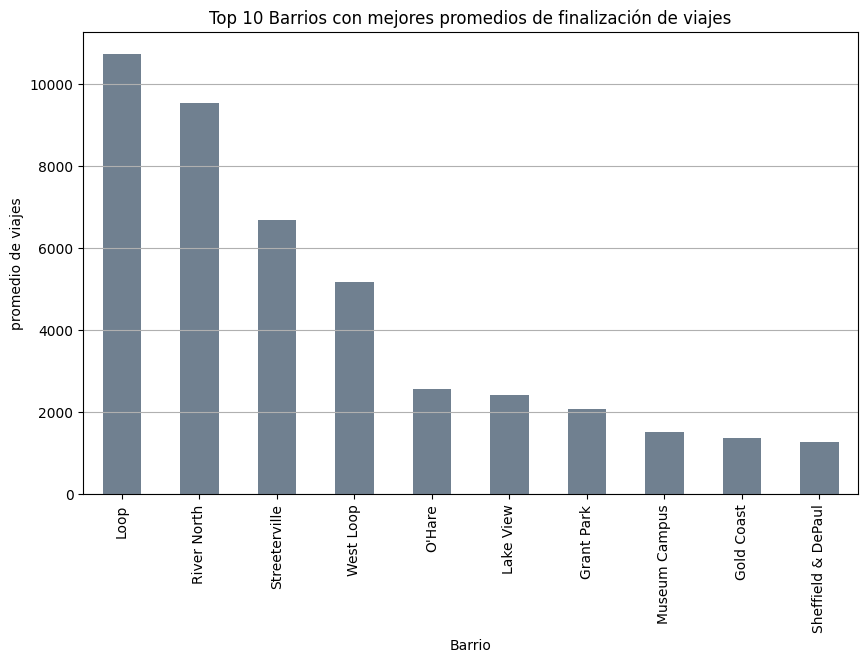

In [15]:
# graficar barrios 
filtro_top10.plot(title= 'Top 10 Barrios con mejores promedios de finalización de viajes',
                  x= 'dropoff_location_name',
                    xlabel= 'Barrio',
                    ylabel='promedio de viajes',
                  kind= 'bar', 
                  rot=90, 
                  color= 'slategrey',
                  figsize = [10,6],
                  legend=False)
plt.grid(axis='y')
plt.show()

<span style="color:blue; font-weight:bold">
En este primer gráfico se muestra el top 10 de barrios y su promedio de viajes finalizados, al analizar los datos se obtiene que Loop es el barrio con mejor promedio, seguido por River North y Streeterville y Sheffield & DePaul es el ultimo dentro de este top 10. Sin embargo después de West Loop, el promedio baja considerablemente.
</span>

In [16]:
# Empresas de taxis y su numero de viajes
empresas_viajes = df_01.groupby('company_name')['trips_amount'].sum().reset_index()
empresas_viajes = empresas_viajes.sort_values(by='trips_amount', ascending=False)
print(empresas_viajes)

                       company_name  trips_amount
45                        Flash Cab         19558
61        Taxi Affiliation Services         11422
50                Medallion Leasing         10367
63                       Yellow Cab          9888
60  Taxi Affiliation Service Yellow          9299
..                              ...           ...
17     4053 - 40193 Adwar H. Nikola             7
7           2733 - 74600 Benny Jona             7
24    5874 - 73628 Sergey Cab Corp.             5
5        2241 - 44667 - Felman Corp             3
12      3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]


In [17]:
filtro_empresas = empresas_viajes.iloc[:10]
print(filtro_empresas)

                         company_name  trips_amount
45                          Flash Cab         19558
61          Taxi Affiliation Services         11422
50                  Medallion Leasing         10367
63                         Yellow Cab          9888
60    Taxi Affiliation Service Yellow          9299
36          Chicago Carriage Cab Corp          9181
43                       City Service          8448
59                           Sun Taxi          7701
58          Star North Management LLC          7455
33  Blue Ribbon Taxi Association Inc.          5953


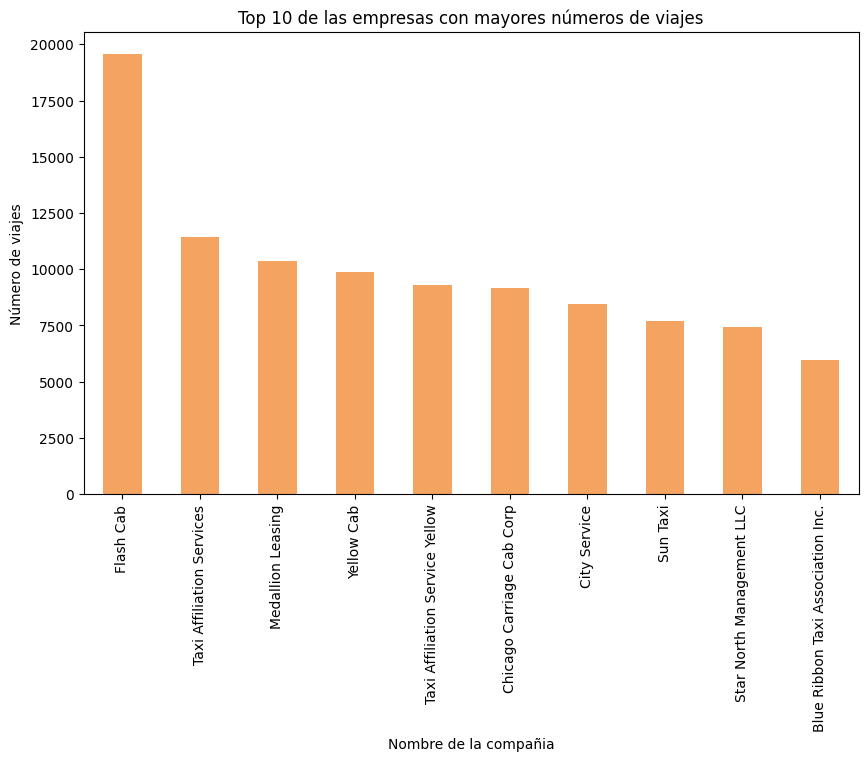

In [18]:
# graficar el numero de viajes realizados por las empresas
filtro_empresas.plot(title='Top 10 de las empresas con mayores números de viajes',
                     x='company_name',
                     xlabel='Nombre de la compañia',
                     ylabel= 'Número de viajes',
                     kind='bar', 
                     figsize=[10,6],
                     color= 'sandybrown', 
                     legend=False)
plt.show()

<span style="color:blue; font-weight:bold">
En este otro gráfico se analizaron las compañías con mejores números de viajes, siendo Flash Cab la top 1 de este análisis, es importante notar que esta compañía podría ser la preferida por los usuarios debido a la gran diferencia con las demás, ya que la siguiente empresa dentro de este top es Taxi Affiliation Services y se observa facilmente que realmente existe una gran distancia entre Flash Cab y esta. Por otra parte a partir de Taxi Affilation Services las demás empresas se muestran constantes en el número de viajes realizados.
</span>

# 5. dataSet 07

In [19]:
# verificar la informacion general del DF 
print(df_07.head)
df_07.info()
df_07.describe()

<bound method NDFrame.head of                  start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0

[1068 rows x 3 columns]>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [20]:
# verificar valores duplicados 
duplicados_07 = df_07[df_07.duplicated(keep=False)]
print(duplicados_07)

                 start_ts weather_conditions  duration_seconds
4     2017-11-11 07:00:00               Good            1440.0
8     2017-11-11 14:00:00               Good            2460.0
10    2017-11-18 06:00:00               Good            1500.0
16    2017-11-04 12:00:00               Good            2640.0
23    2017-11-04 14:00:00               Good            3360.0
...                   ...                ...               ...
1054  2017-11-11 07:00:00               Good            1380.0
1058  2017-11-25 12:00:00               Good            1440.0
1062  2017-11-11 06:00:00               Good            1500.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0

[312 rows x 3 columns]


In [21]:
# verificar valores ausentes
ausentes_07 = df_07.isna().sum()
print(ausentes_07)

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


In [22]:
unicos_07 = df_07['start_ts'].unique()
print(unicos_07)

['2017-11-25 16:00:00' '2017-11-25 14:00:00' '2017-11-25 12:00:00'
 '2017-11-04 10:00:00' '2017-11-11 07:00:00' '2017-11-11 04:00:00'
 '2017-11-04 16:00:00' '2017-11-18 11:00:00' '2017-11-11 14:00:00'
 '2017-11-11 12:00:00' '2017-11-18 06:00:00' '2017-11-04 11:00:00'
 '2017-11-11 08:00:00' '2017-11-04 08:00:00' '2017-11-11 16:00:00'
 '2017-11-25 13:00:00' '2017-11-04 12:00:00' '2017-11-25 10:00:00'
 '2017-11-11 13:00:00' '2017-11-18 14:00:00' '2017-11-04 14:00:00'
 '2017-11-25 20:00:00' '2017-11-11 11:00:00' '2017-11-18 12:00:00'
 '2017-11-11 10:00:00' '2017-11-04 17:00:00' '2017-11-11 09:00:00'
 '2017-11-04 06:00:00' '2017-11-04 05:00:00' '2017-11-11 19:00:00'
 '2017-11-04 13:00:00' '2017-11-04 07:00:00' '2017-11-11 06:00:00'
 '2017-11-04 09:00:00' '2017-11-11 05:00:00' '2017-11-18 10:00:00'
 '2017-11-25 05:00:00' '2017-11-25 08:00:00' '2017-11-04 18:00:00'
 '2017-11-11 18:00:00' '2017-11-18 16:00:00' '2017-11-11 15:00:00'
 '2017-11-11 17:00:00' '2017-11-25 07:00:00' '2017-11-18 05:00

In [23]:
n_unicos_07 = df_07['start_ts'].nunique()
print(f'El numero de valores unicos es: {n_unicos_07}')

El numero de valores unicos es: 81


In [24]:
# cambiar el tipo de dato de la columna 'start_ts' a date
df_07['start_ts'] = pd.to_datetime(df_07['start_ts'])
df_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


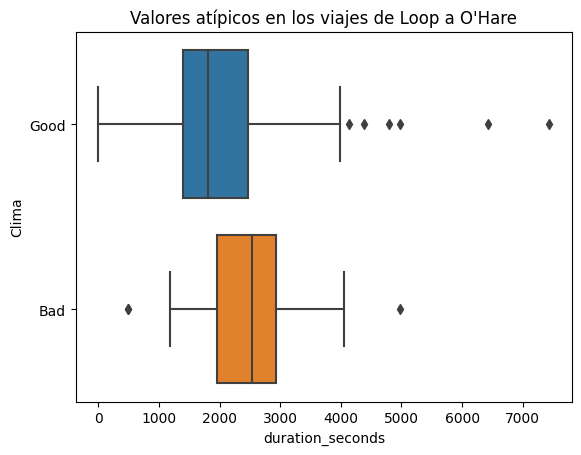

<Figure size 1000x600 with 0 Axes>

In [44]:
# graficar valores atipicos 
sns.boxplot(x='duration_seconds',
            y='weather_conditions',
            data=df_07)
plt.title('Valores atípicos en los viajes de Loop a O\'Hare')
plt.ylabel('Clima')
plt.figure(figsize=(10,6))
plt.show()

In [31]:
# # eliminar valores atipicos 
Q1 = df_07['duration_seconds'].quantile(0.25)
Q3 = df_07['duration_seconds'].quantile(0.75)
# calcular el rango intercuartilico
IQR = Q3 - Q1

# definir limite superior e inferior
limite_inferior = Q1 - (1.5 * IQR)
limite_superior = Q3 + (1.5 * IQR)

#mostrar datos atipicos
df_atipicos = df_07[(df_07['duration_seconds'] < limite_inferior) | (df_07['duration_seconds'] > limite_superior)]
print(df_atipicos)

               start_ts weather_conditions  duration_seconds
79  2017-11-11 15:00:00               Good            4800.0
276 2017-11-18 12:00:00                Bad            4980.0
354 2017-11-25 11:00:00               Good            7440.0
583 2017-11-11 16:00:00               Good            4980.0
619 2017-11-25 14:00:00               Good            6420.0
646 2017-11-11 13:00:00               Good            4380.0


In [34]:
# eliminar valores atipicos del DF
datos_hipotesis = df_07.query('duration_seconds >= @limite_inferior and duration_seconds <= @limite_superior')

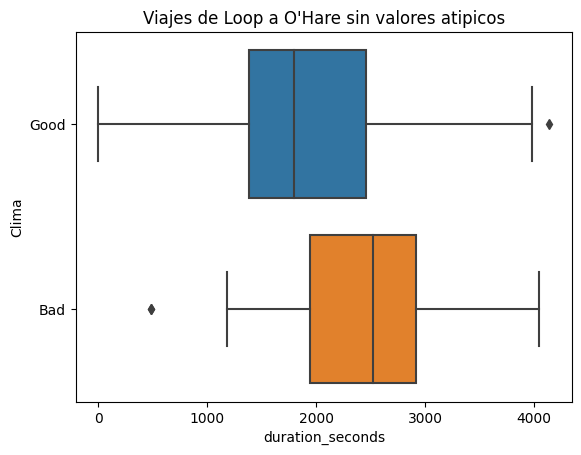

<Figure size 1000x600 with 0 Axes>

In [43]:
# graficar valores atipicos 
sns.boxplot(x='duration_seconds',
            y='weather_conditions',
            data= datos_hipotesis)
plt.title('Viajes de Loop a O\'Hare sin valores atipicos')
plt.ylabel('Clima')
plt.figure(figsize=(10,6))
plt.show()

<span style="color:blue; font-weight:bold">
Al revisar la información del DF encontre valores duplicados, sin embargo al analizarlos estos no podrian ser eliminados ya que pueden representan viajes que ocurrieron al mismo tiempo, o comparten las mismas condiciones de clima o el mismo tiempo de duración, por lo cual es necesario preservarlos ya que son relevantes para comprobar la hipótesis. Por otra parte cambie el tipo de datos de object a datetime. Al revisar los valores atipicos en este DF son pocos, pero los he eliminado.
</span>

# 5.1 Prueba de Hipótesis 

# Hipótesis 1: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

# Hipótesis Nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia en los sábados lluviosos

# Hipótesis Alternativa: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en los sábados lluviosos

In [36]:
# extraer los dias sabados lluviosos del DF sin valores atipicos
df_sabados = datos_hipotesis[datos_hipotesis['start_ts'].dt.weekday == 5]

#filtro sabados lluviosos
sabados_lluviosos = df_sabados[df_sabados['weather_conditions'] == "Bad"]

# promedio de sabados lluviosos
mean_sabado_lluvioso = sabados_lluviosos['duration_seconds'].mean()

# promedio de todos los sabados
mean_sabados = df_sabados['duration_seconds'].mean()

print(f'El promedio en sabados lluviosos es: {mean_sabado_lluvioso}')
print(f'El promedio en todos los sabados es: {mean_sabados}')

El promedio en sabados lluviosos es: 2412.9441340782123
El promedio en todos los sabados es: 2052.3625235404897


In [37]:
# comprobar hipotesis 
alpha = 0.05

# prueba de levene 
levene = st.levene(sabados_lluviosos['duration_seconds'], df_sabados['duration_seconds'])
print('Resultado de:', levene)

# Decidir a partir de la prueba de levene que equal_var utilizar en ttest

if levene.pvalue > alpha:
    equal_var = True
    print('Varianzas iguales: usar equal_var=True en ttest.')
else:
    equal_var = False
    print('Varianzas desiguales: usar equal_var=False en ttest.')

# prueba ttest
resultado = st.ttest_ind(sabados_lluviosos['duration_seconds'], df_sabados['duration_seconds'], equal_var =True)

# extraer el pvalue
print('El valor p es: ', resultado.pvalue)

# comparar el valor p con el nivel de significacia
if resultado.pvalue < alpha:
    print('Rechazar la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Resultado de: LeveneResult(statistic=2.1858541163435175, pvalue=0.13953794543909348)
Varianzas iguales: usar equal_var=True en ttest.
El valor p es:  7.3537671111664e-10
Rechazar la hipótesis nula


<span style="color:blue; font-weight:bold">
Para comprobar la hipotesis se realizo un filtro donde se extrajeron los datos del dia sabado tanto lluvisosos como con buen clima, se establecio un nivel de significancia del 0.05, y se escogio una prueba T de Student para muestras independientes. De esta manera se obtuvo un valor p mayor al nivel de significancia (alpha) lo que indica que se debe rechazar la hipótesis nula y podemos confirmar que si existen diferencias significativas en el tiempo promedio de los viajes los dias sabados cuando hay presencia de lluvia.
</span>

# conclusion general 

1. Para los primeros dos DF no se encontraron datos nulos ni ausentes y errores en los tipos de datos, por lo cual no fue necesario realizar cambios. Durante el análisis se encontro que  Loop es el barrio con mejor promedio en cuanto a viajes finalizados, seguido por River North y Streeterville y Sheffield & DePaul es el ultimo dentro de este top 10. Sin embargo después de West Loop, el promedio baja considerablemente.

2. Para el segundo grafico se encontro que Flash Cab la top 1 por lo cual esta compañía podría ser la preferida por los usuarios debido a la gran diferencia con las demás, ya que la siguiente empresa dentro de este top que es Taxi Affiliation Services se observa facilmente que existe una gran distancia entre Flash Cab y esta ultima . Por otra parte a partir de Taxi Affilation Services las demás empresas se muestran constantes en el número de viajes realizados.

3. Para el ultimo DF se encontraron valores duplicados, sin embargo al revisarlos se logro concluir que estos datos son relevantes para la comprobacion de la hipotesis ya que pueden ser viajes que se realizaron en el mismo dia, y a la misma hora y con el mismo clima. Por otra parte se encontraron algunos valores atipicos, los cuales fueron analizados y decidi eliminarlos para no afectar el resultado de la prueba de hipotesis. De esta manera se desarrollaron las hipotesis nula y alternativa; para poder comprobarlas se establecio un alpha de 0.05 antes de realizar la prueba T de student se realizo una prueba levene para conocer si las varianzas de los datos, y se obtuvo como resultado que se tenian varianzas iguales, de esta manera se continuo con la comprobacionde la hipotesis y se obtuvo como resultado un valor p mayor al nivel de significancia elegido por lo cual la hipotesis nula debio ser rechazada y se concluye que existen diferencias significativas en el promedio de tiempo de los viajes los dias sabados cuando hay presencia de lluvia, esto tambien fue observado al analizar los valores atipicos. 